In [11]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
from glob2 import glob

path_gbm = '/anvar/public_datasets/preproc_study/gbm/1_reg'
path_bgpd = '/anvar/public_datasets/preproc_study/bgpd/orig'
path_schw = '/anvar/public_datasets/preproc_study/schw/orig'

list_gbm = glob(path_gbm + '/**/CT1_SEG.nii.gz')
list_bgpd = glob(path_bgpd + '/**/mask_GTV_FLAIR.nii.gz')
list_schw = glob(path_schw + '/**/T1_SEG.nii.gz')

In [26]:
# checking for right labels
import ants

for img_path in tqdm(list_gbm):
    img_orig = ants.image_read(img_path)
    channels = np.unique(img_orig.numpy())[1:]
    if channels[0] != 1:
        print(img_path)
        print('weird channels', channels)
        result_arr = img_orig.numpy()
        result_arr[result_arr == channels[0]] = int(1)
        result_arr[result_arr == channels[1]] = int(2)
        result_arr[result_arr == channels[2]] = int(3)
        img_new = img_orig.new_image_like(result_arr)
        print(np.unique(img_new.numpy())[1:])
#         os.remove(img_path)
#         ants.image_write(img_new, img_path, ri=False);

 19%|█▊        | 19/102 [00:05<00:14,  5.69it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-6661/CT1_SEG.nii.gz
weird channels [1.560928 4.682784 6.243712]
[1. 2. 3.]


 46%|████▌     | 47/102 [00:15<00:24,  2.25it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-14-1794/CT1_SEG.nii.gz
weird channels [2.5308914 5.061783  7.5926743]


 47%|████▋     | 48/102 [00:15<00:25,  2.09it/s]

[1. 2. 3.]


 58%|█████▊    | 59/102 [00:21<00:19,  2.21it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-6657/CT1_SEG.nii.gz
weird channels [3.2803419 6.5606837 9.841025 ]
[1. 2. 3.]


 61%|██████    | 62/102 [00:22<00:12,  3.29it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-6662/CT1_SEG.nii.gz
weird channels [1.8251526 3.6503053 5.475458 ]
[1. 2. 3.]


 70%|██████▉   | 71/102 [00:26<00:16,  1.87it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-4935/CT1_SEG.nii.gz
weird channels [1.4778999 2.9557998 4.4336996]
[1. 2. 3.]


 76%|███████▋  | 78/102 [00:28<00:05,  4.22it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-6664/CT1_SEG.nii.gz
weird channels [1.8178266 3.6356533 5.45348  ]
[1. 2. 3.]
/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-6663/CT1_SEG.nii.gz
weird channels [ 3.823199  7.646398 11.469597]
[1. 2. 3.]


 78%|███████▊  | 80/102 [00:28<00:04,  4.78it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-4934/CT1_SEG.nii.gz
weird channels [1.524298 3.048596 4.572894]
[1. 2. 3.]


 95%|█████████▌| 97/102 [00:38<00:02,  1.76it/s]

/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-76-6656/CT1_SEG.nii.gz
weird channels [1.9323565 3.864713  5.7970695]
[1. 2. 3.]


100%|██████████| 102/102 [00:39<00:00,  2.56it/s]


### Quality check:

In [39]:
base_dir = '/anvar/public_datasets/preproc_study/bgpd/4a_resamp/'
mask = 'mask_GTV_FLAIR.nii.gz'

for patient in tqdm(os.listdir(base_dir)):
    if not patient == 'logging.txt':
        for modality in ['T1.nii.gz','T2.nii.gz','FLAIR.nii.gz','CT1.nii.gz', mask]:
            img = ants.image_read('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/{}/{}'.format(patient, modality))
            
            if modality == 'T1.nii.gz':
                t1_shape = np.shape(img.numpy())
                
            if modality == 'T2.nii.gz':
                t2_shape = np.shape(img.numpy())
                
            if modality == 'FLAIR.nii.gz':
                flair_shape = np.shape(img.numpy())
                
            # test for binary mask
            if modality == mask:
                # for 1 channel labels
                if len(np.unique(img.numpy())) > 2:
                    print(patient, np.unique(img.numpy()))
                mask_shape = np.shape(img.numpy())
            # test for nans    
            if not img.sum() > 0:
                print(patient, modality, 'Amount of nans:', np.shape(np.argwhere(np.isnan(img.numpy()))))
        
        # test for shapaes
        if (t1_shape != t2_shape)| (t1_shape != flair_shape) | (t1_shape != mask_shape):
            print(patient, ' t1', t1_shape, ' t2', t2_shape, 'flair', flair_shape, ' mask', mask_shape)

100%|██████████| 181/181 [05:52<00:00,  1.95s/it]


In [183]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/6_hist_test/')

['6_hist_fold_1', '6_hist_fold_0', 'logging.txt']

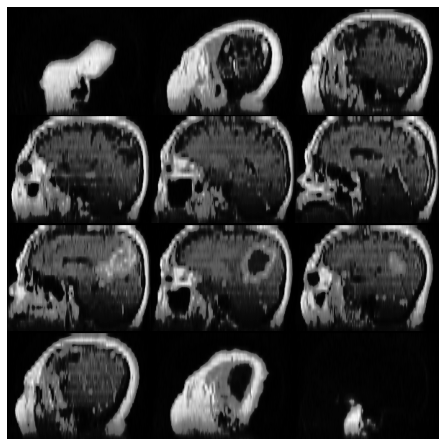

(200, 200, 150)

In [189]:
img = ants.image_read('/anvar/public_datasets/preproc_study/gbm/6_hist_test/6_hist_fold_0/TCGA-06-0142/CT1.nii.gz')
ants.plot(img)
ants.image_write(img, 'CT1_hist.nii.gz')
img.shape

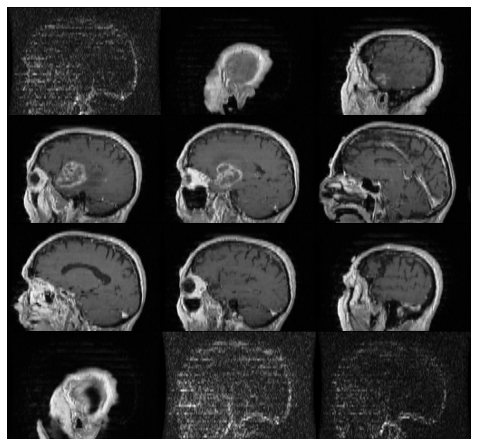

(240, 240, 168)

In [188]:
img = ants.image_read('/anvar/public_datasets/preproc_study/gbm/4a_resamp/TCGA-06-0142/CT1.nii.gz')
ants.plot(img)
ants.image_write(img, 'CT1_orig.nii.gz')
img.shape

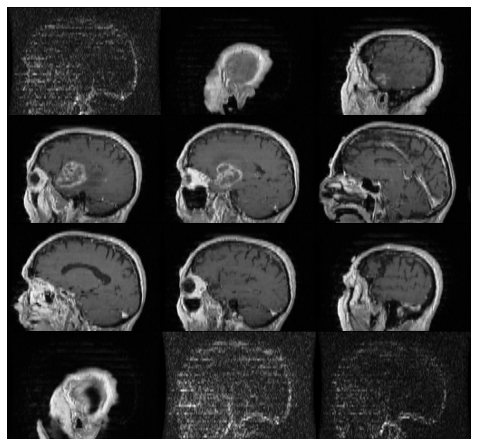

In [84]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/4a_resamp/TCGA-06-0142/CT1.nii.gz'))

In [85]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/6_hist/6_hist_fold_2/TCGA-06-0142/CT1_SEG.nii.gz')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 168)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-121.5, 109.6625, -92.1)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [156]:
ct1_hist = ants.image_read('/anvar/public_datasets/preproc_study/gbm/6_hist/6_hist_fold_0/TCGA-06-0142/CT1.nii.gz')
ct1 = ants.image_read('/anvar/public_datasets/preproc_study/gbm/4a_resamp/TCGA-06-0142/CT1.nii.gz')

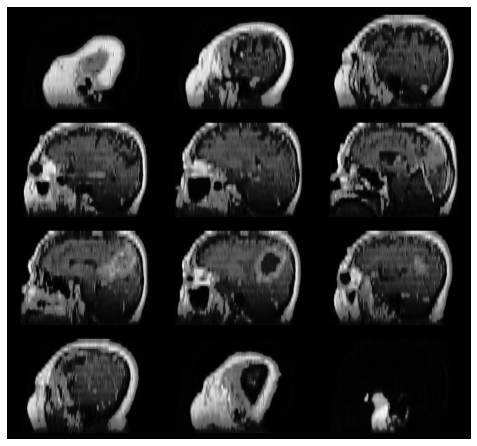

In [145]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/6_hist/6_hist_fold_2/TCGA-06-0142/CT1.nii.gz'))

In [143]:
from dpipe.im.visualize import slice3d

In [153]:
ct1_hist.numpy().shape, ct1.numpy().shape,

((200, 200, 150), (240, 240, 168))

In [158]:
slice3d(ct1_hist.numpy()- ct1.numpy())

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=167), Output()), _dom…

In [155]:
slice3d(ct1.numpy())

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=167), Output()), _dom…

In [134]:
import torchio as tio

file = '/anvar/public_datasets/preproc_study/gbm/6_hist/6_hist_fold_2/TCGA-02-0037/FLAIR.nii.gz'
new = tio.ScalarImage(file)
old_shape = np.shape(
    ants.image_read('/anvar/public_datasets/preproc_study/gbm/4a_resamp/TCGA-02-0037/T1.nii.gz').numpy()
)
transform = tio.CropOrPad(old_shape)
transformed = transform(new)

transformed.save(file)

In [116]:
file = '/anvar/public_datasets/preproc_study/gbm/6_hist/6_hist_fold_2/TCGA-06-0142/FLAIR.nii.gz'
ants.image_read(file)

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 168)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-120.0, 122.3187, -62.5)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [89]:
transformed

ScalarImage(shape: (1, 240, 240, 168); spacing: (1.00, 1.00, 1.00); orientation: LAS+; dtype: torch.FloatTensor; memory: 36.9 MiB)

In [190]:
base_dir = '/anvar/public_datasets/preproc_study/gbm/4a_resamp/'
predicate_dir = '/anvar/public_datasets/preproc_study/gbm/3a_atlas/'
mask = 'CT1_SEG.nii.gz'
label = [0,1,2,3]

check_path(base_dir, predicate_dir, mask, label, check_pred = False)

  1%|          | 1/103 [00:02<04:52,  2.87s/it]

TCGA-02-0086 mask_GTV_FLAIR.nii.gz
File /anvar/public_datasets/preproc_study/gbm/4a_resamp//TCGA-02-0086/mask_GTV_FLAIR.nii.gz does not exist!


  2%|▏         | 2/103 [00:04<04:17,  2.55s/it]

TCGA-02-0102 mask_GTV_FLAIR.nii.gz
File /anvar/public_datasets/preproc_study/gbm/4a_resamp//TCGA-02-0102/mask_GTV_FLAIR.nii.gz does not exist!


  3%|▎         | 3/103 [00:06<04:00,  2.40s/it]

TCGA-02-0059 mask_GTV_FLAIR.nii.gz
File /anvar/public_datasets/preproc_study/gbm/4a_resamp//TCGA-02-0059/mask_GTV_FLAIR.nii.gz does not exist!


  3%|▎         | 3/103 [00:09<05:08,  3.09s/it]


KeyboardInterrupt: 

In [216]:
os.listdir('/anvar/public_datasets/preproc_study/bgpd/1_reg/1360_18')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'mask_GTV_FLAIR.nii.gz',
 'CT1.nii.gz']

In [217]:
ants.image_read(
    '/anvar/public_datasets/preproc_study/bgpd/1_reg/1360_18/T2.nii.gz')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 160)
	 Spacing    : (1.0352, 1.0352, 1.05)
	 Origin     : (-127.4183, 155.3809, -84.7808)
	 Direction  : [ 0.9974 -0.0715  0.0015 -0.0712 -0.9945 -0.077  -0.007  -0.0767  0.997 ]

In [215]:
ants.image_read(
    '/anvar/public_datasets/preproc_study/bgpd/5_ss_shared/1360_18/T2.nii.gz')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (265, 265, 168)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-127.4183, 155.3809, -84.7808)
	 Direction  : [ 0.9974 -0.0715  0.0015 -0.0712 -0.9945 -0.077  -0.007  -0.0767  0.997 ]

In [218]:
ants.image_read(
    '/anvar/public_datasets/preproc_study/bgpd/2a_interp/1360_18/T2.nii.gz')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.1045, 1.1045, 1.0841)
	 Origin     : (-127.4183, 155.3809, -84.7808)
	 Direction  : [ 0.9974 -0.0715  0.0015 -0.0712 -0.9945 -0.077  -0.007  -0.0767  0.997 ]

In [214]:
os.listdir('/anvar/public_datasets/preproc_study/bgpd/')

['3a_atlas', 'orig', '2a_interp', '4a_resamp', '1_reg']

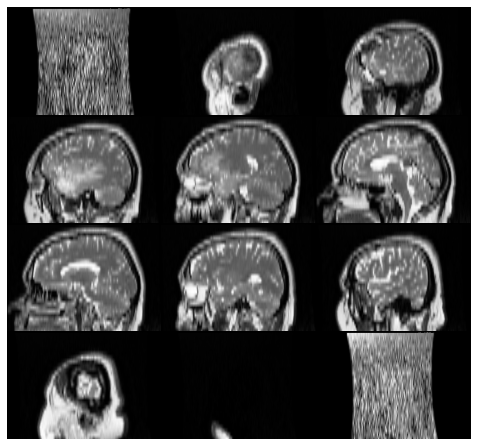

In [5]:
import ants
ants.plot('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/Patient_95717/T2.nii.gz')

In [15]:
base_dir = '/anvar/public_datasets/preproc_study/bgpd/6_hist/6_hist_fold_0/'
predicate_dir = '/anvar/public_datasets/preproc_study/bgpd/4a_resamp/'
mask = 'mask_GTV_FLAIR.nii.gz'
label = [0,1]
check_path(base_dir, predicate_dir, mask, label, check_pred = False)

  1%|          | 1/171 [00:03<08:42,  3.08s/it]


KeyboardInterrupt: 

In [16]:
base_dir = '/anvar/public_datasets/preproc_study/bgpd/4d_susan/'
predicate_dir = '/anvar/public_datasets/preproc_study/bgpd/4a_resamp/'
mask = 'mask_GTV_FLAIR.nii.gz'
label = [0,1]
check_path(base_dir, predicate_dir, mask, label, check_pred = False)

100%|██████████| 181/181 [08:45<00:00,  2.90s/it]


### Padding after histogram

In [122]:
rm /anvar/public_datasets/preproc_study/bgpd/4a_resamp/logging.txt

In [123]:
os.listdir('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')

['1360_18',
 'Patient_98817',
 'Patient_110816',
 '1421_18',
 '1357_19_4',
 'Patient_49617',
 'Patient_2914',
 'Patient_102117',
 'Patient_24117',
 '1470_18_4',
 'Patient_92114',
 'Patient_54317',
 'Patient_66615',
 '1302_18_4',
 'Patient_43316',
 '1635_18',
 'Patient_136715',
 'Patient_62817',
 'Patient_52315',
 '1463_18_4',
 'Patient_1000815',
 'Patient_70614',
 '558_18_4',
 '608_18_4',
 'Patient_33217',
 'Patient_111016',
 'Patient_12417',
 '705_18_4',
 'Patient_140316',
 'Patient_48417',
 '672_18_4',
 'Patient_75116',
 '1056_18_4',
 'Patient_88917',
 '875_18_4',
 '946_18',
 'Patient_76516',
 'Patient_161316',
 'Patient_90517',
 'Patient_24815',
 'Patient_90616',
 '688_18',
 '1326_18',
 'Patient_137315',
 '971_18_4',
 'Patient_109017',
 '1036_18',
 '1258_18',
 'Patient_103717',
 'Patient_69515',
 '1043_18_4',
 'Patient_129816',
 '1795_18_',
 'Patient_43515',
 'Patient_110014',
 '1743_18_4',
 'Patient_122315',
 '575_18_4',
 '607_18',
 '1029_18_4',
 'Patient_65516',
 'Patient_129316',

In [129]:
base_dir = '/anvar/public_datasets/preproc_study/bgpd/6_hist/6_hist_fold_2'
predicate_dir = '/anvar/public_datasets/preproc_study/bgpd/4a_resamp/'
mask = 'mask_GTV_FLAIR.nii.gz'
label = [0,1]
check_path(base_dir, predicate_dir, mask, label, check_pred = False)

100%|██████████| 80/80 [03:27<00:00,  2.59s/it]


In [92]:
import torchio as tio

patient = 'Patient_95717'

for modality in ['FLAIR', 'T1', 'CT1', 'T2']:
    file = '/anvar/public_datasets/preproc_study/bgpd/6_hist/6_hist_fold_1/{}/{}.nii.gz'.format(patient, modality)
    new = tio.ScalarImage(file)
    old_shape = np.shape(
        ants.image_read('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/{}/{}.nii.gz'.format(patient, modality)).numpy()
    )
    transform = tio.CropOrPad(old_shape)
    transformed = transform(new)

    transformed.save(file)

In [93]:
ants.image_read(file)

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 168)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-114.3957, 93.4905, -83.7065)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]